In [18]:
# Import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mixture Models Clustering
## Non probabilistic models
### K-means
*K-means* algorithm is an unsupervised machine learning technique that aims to partition $n$ observations into $k$ clusters ($k$ is a parameter of the algorithm) in such a way that every data point is allocated to the nearest cluster.

We will see how this simple clustering algorithm works on a toy dataset, enlighting its main limitations. <br>
Then we will show how probabilistic models can overcome them.


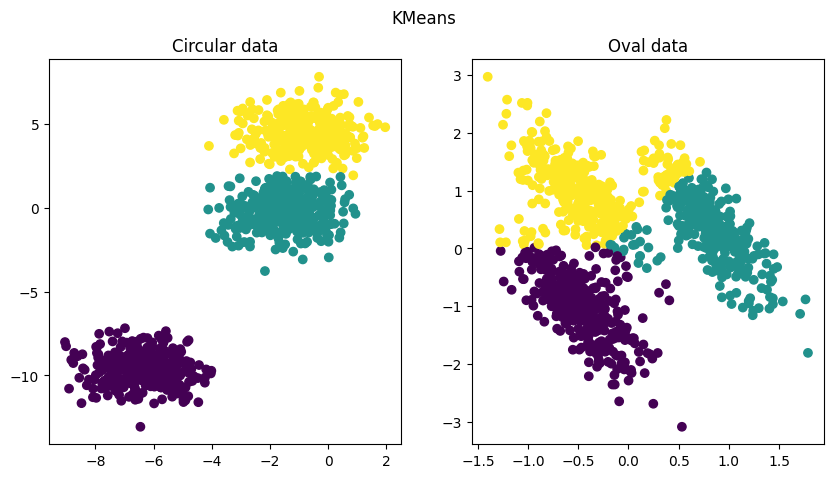

In [20]:
# KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate data
## Circular data
X_circular, y_circular = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=11)
## Oval data
centers = [[-5, 0], [0, 1.5], [5, -1]]
X_oval, y_oval = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=11)
transformation = [[0.1, 0.2], [-0.3, 0.6]]
X_oval = np.dot(X_oval, transformation)


# Apply KMeans
kmeans_circular = KMeans(n_init = 10, n_clusters=3, random_state=0).fit(X_circular)
kmeans_oval = KMeans(n_init = 10, n_clusters=3, random_state=0).fit(X_oval)

# Plotting results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_circular[:, 0], X_circular[:, 1], c=kmeans_circular.labels_)
ax[0].set_title('Circular data')
ax[1].scatter(X_oval[:, 0], X_oval[:, 1], c=kmeans_oval.labels_)
ax[1].set_title('Oval data')
fig.suptitle('KMeans')
plt.show()

KMeans doesn't work well with non-convex clusters.

Let's see how GMM works on the same data for comparison.

First we try GMM with EM, using the same number of clusters as K-means.

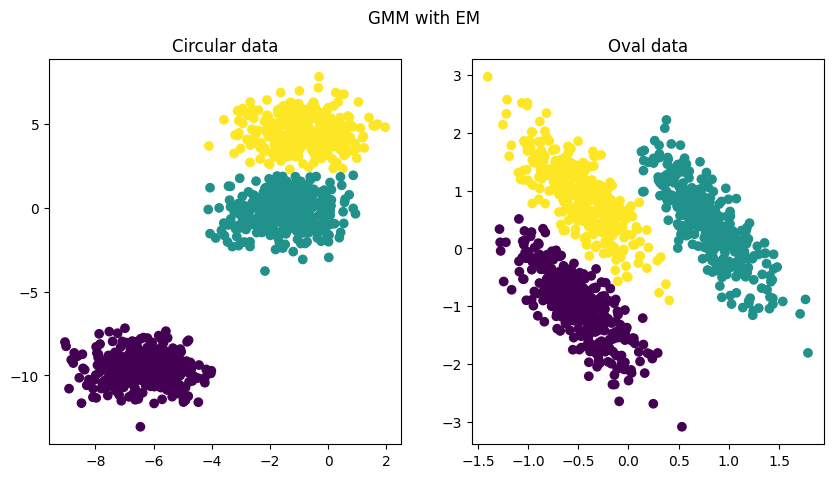

In [21]:
# GMM with EM
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture
gmm_circular = GaussianMixture(n_components=3, random_state=0).fit(X_circular)
gmm_oval = GaussianMixture(n_components=3, random_state=0).fit(X_oval)

# Plotting results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_circular[:, 0], X_circular[:, 1], c=gmm_circular.predict(X_circular))
ax[0].set_title('Circular data')
ax[1].scatter(X_oval[:, 0], X_oval[:, 1], c=gmm_oval.predict(X_oval))
ax[1].set_title('Oval data')
fig.suptitle('GMM with EM')
plt.show()

As you can see in this example, GMM with EM works better than K-means when the clusters are not in a spherical shape, and it also still works good with the convex ones.

A drawback of both these techniques is that they require the number of clusters to be specified.

Now let's see how Bayesian GMM works on this data.

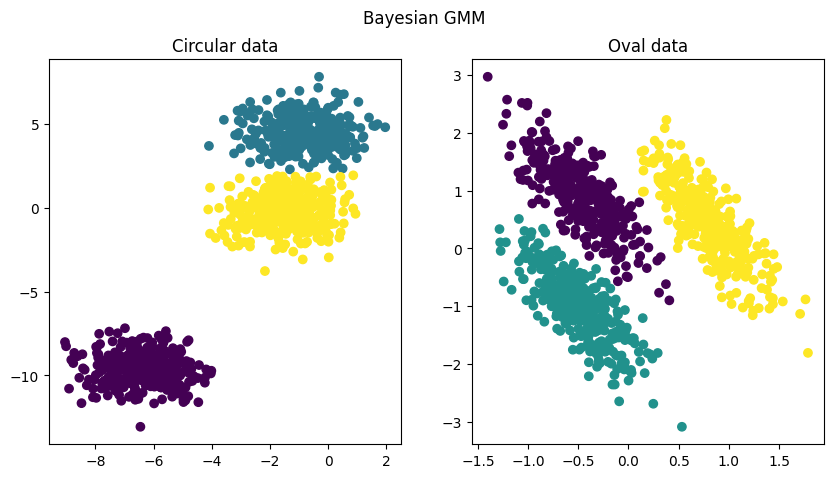

In [22]:
# Bayesian Gaussian Mixture
from sklearn.mixture import BayesianGaussianMixture

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_circular = BayesianGaussianMixture(n_components=15, random_state=0).fit(X_circular)
bgmm_oval = BayesianGaussianMixture(n_components=15, random_state=0).fit(X_oval)

# Plotting results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_circular[:, 0], X_circular[:, 1], c=bgmm_circular.predict(X_circular))
ax[0].set_title('Circular data')
ax[1].scatter(X_oval[:, 0], X_oval[:, 1], c=bgmm_oval.predict(X_oval))
ax[1].set_title('Oval data')
fig.suptitle('Bayesian GMM')
plt.show()

Bayesian GMM is able to detect the number of clusters automatically, and it also works better than KMeans in the case of non-spherical data, so it's better overall when compared to the two previous techniques.

### DBSCAN
*Density-Based Special Clustering of Applications with Noise*, commonly know as DBSCAN, is another machine learning algorithm that belongs to unsupervised learning techniques.
### Hierarchical clustering
*Hierarchical clustering* is a method for clustering. It creates groups so that objects within a group are similar to each other and different from objects that belong to another group. 
Different approches to solve the Hierarchical problem include Agglomerative (bottom-up) and Divisive (top-down).
## Probabilistic models
### Bayesian Gaussian Mixture Models
### Bayesian Mixture Models with other distributions
### Mixture Models with EM
### Model comparisons